In [3]:
pip  install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 20.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 22.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 37.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy90m╺━━━━━━━━━━━━━━━━━━━━━━━━ 10/26 [opt-einsum]-data-server]
    Found existing installation: numpy 2.2.6━━━━━━━━━━━━━━━━━━ 10/26 [opt-einsum]
    Uninstalling numpy-2.2.6:━━━━━━━━━━━━━━━━━━━━━━━━ 10/26 [opt-einsum]
      Successfully uninstalle

In [5]:
pip install tensorflow matplotlib


Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

2025-06-29 18:06:48.227140: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-29 18:06:48.230718: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-29 18:06:48.239346: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751220408.253589     549 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751220408.257813     549 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751220408.269573     549 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [7]:
from tensorflow.keras.datasets import mnist
# Download and load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Print shape of data
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


# View images in  trainining  data it so that it can be understood.

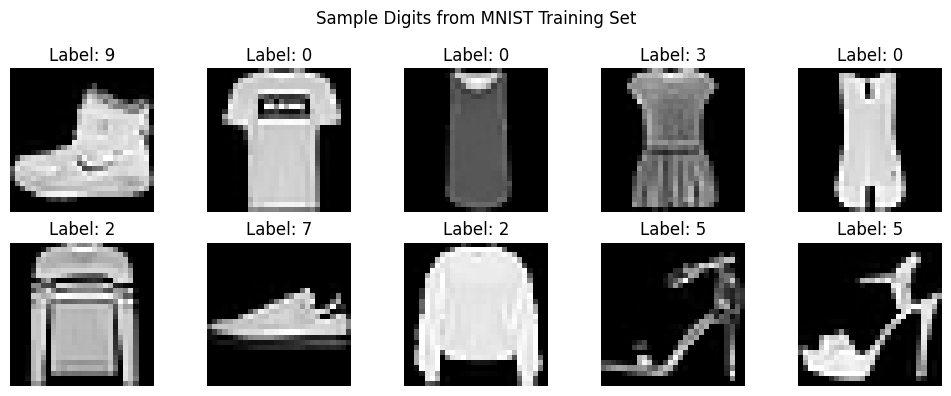

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i]) if y_train.ndim == 2 else y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Digits from MNIST Training Set")
plt.tight_layout()
plt.show()



# Check class distribution

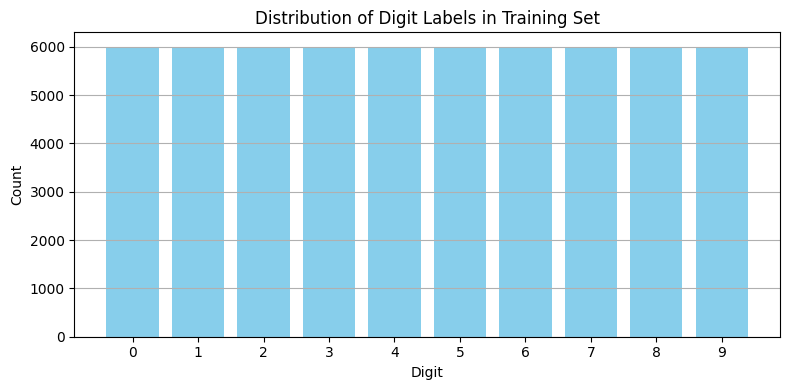

In [23]:

if y_train.ndim == 2:
    labels = np.argmax(y_train, axis=1)
else:
    labels = y_train

unique, counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(8, 4))
plt.bar(unique, counts, color='skyblue')
plt.title("Distribution of Digit Labels in Training Set")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.xticks(unique)
plt.grid(axis='y')
plt.tight_layout()
plt.show()




#check shapes

In [24]:
# Display the shape of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000, 10)
y_test shape: (10000, 10)


In [8]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##Data Nomalization

In [9]:
# Normalize  data using one-hot encode
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build model

In [11]:

from tensorflow.keras.layers import Input

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


compile the model

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5


2025-06-29 18:13:25.466887: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7772 - loss: 0.6436 - val_accuracy: 0.8415 - val_loss: 0.4210
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8606 - loss: 0.3770 - val_accuracy: 0.8672 - val_loss: 0.3538
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8770 - loss: 0.3398 - val_accuracy: 0.8777 - val_loss: 0.3361
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8832 - loss: 0.3174 - val_accuracy: 0.8712 - val_loss: 0.3564
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8902 - loss: 0.2927 - val_accuracy: 0.8835 - val_loss: 0.3260


In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)
#you can increase the epoch to 10 to compare accurany


Epoch 1/5
 106/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8976 - loss: 0.2633

2025-06-29 18:15:03.102261: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8943 - loss: 0.2769 - val_accuracy: 0.8757 - val_loss: 0.3521
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9013 - loss: 0.2658 - val_accuracy: 0.8860 - val_loss: 0.3264
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9045 - loss: 0.2508 - val_accuracy: 0.8837 - val_loss: 0.3302
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9091 - loss: 0.2409 - val_accuracy: 0.8818 - val_loss: 0.3318
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9141 - loss: 0.2324 - val_accuracy: 0.8877 - val_loss: 0.3261


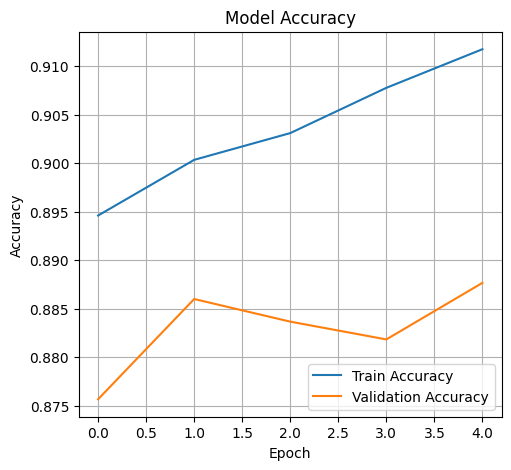

In [17]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)

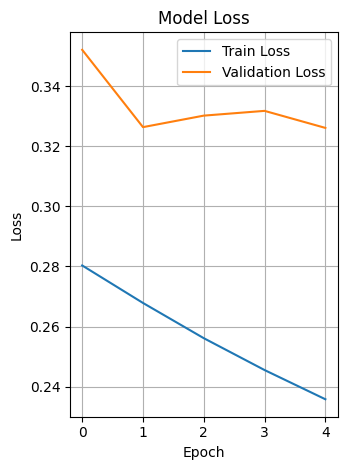

In [18]:
# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

#Confusion Matrix Code process

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)



241/313 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step

2025-06-29 18:16:42.405108: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step


# confusion matrix

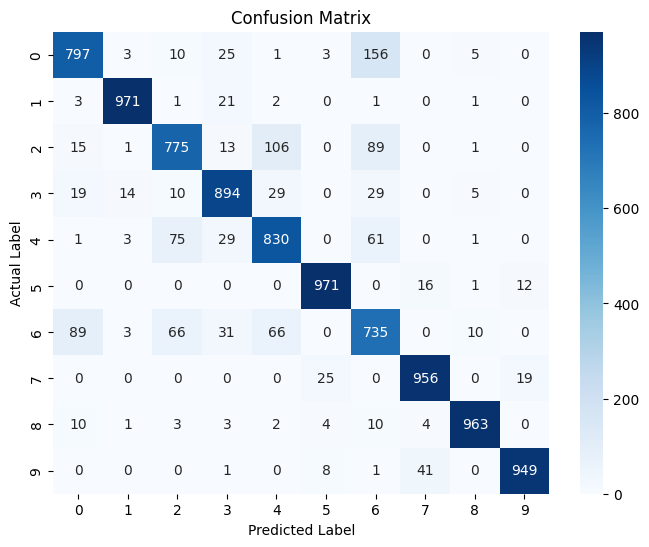

In [20]:

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


precision and Recall

In [25]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_true, y_pred_classes, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Display as a styled table
print(df_report)


              precision  recall  f1-score     support
0              0.853319  0.7970  0.824199   1000.0000
1              0.974900  0.9710  0.972946   1000.0000
2              0.824468  0.7750  0.798969   1000.0000
3              0.879056  0.8940  0.886465   1000.0000
4              0.801158  0.8300  0.815324   1000.0000
5              0.960435  0.9710  0.965689   1000.0000
6              0.679298  0.7350  0.706052   1000.0000
7              0.940020  0.9560  0.947942   1000.0000
8              0.975684  0.9630  0.969300   1000.0000
9              0.968367  0.9490  0.958586   1000.0000
accuracy       0.884100  0.8841  0.884100      0.8841
macro avg      0.885670  0.8841  0.884547  10000.0000
weighted avg   0.885670  0.8841  0.884547  10000.0000


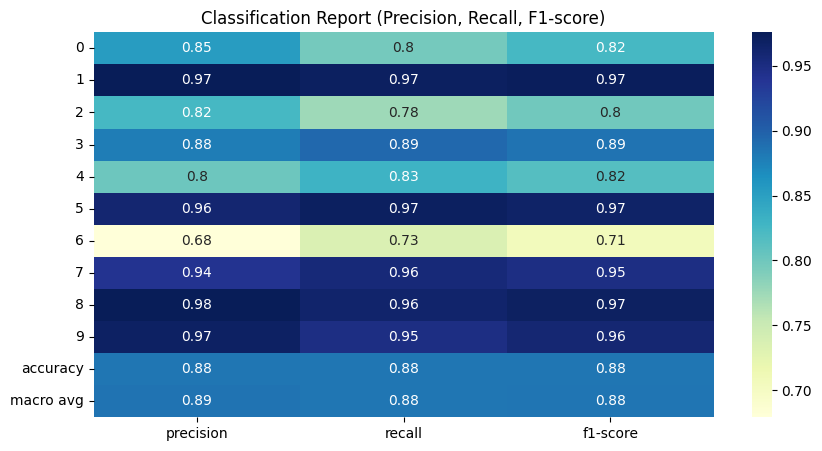

In [26]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title("Classification Report (Precision, Recall, F1-score)")
plt.show()


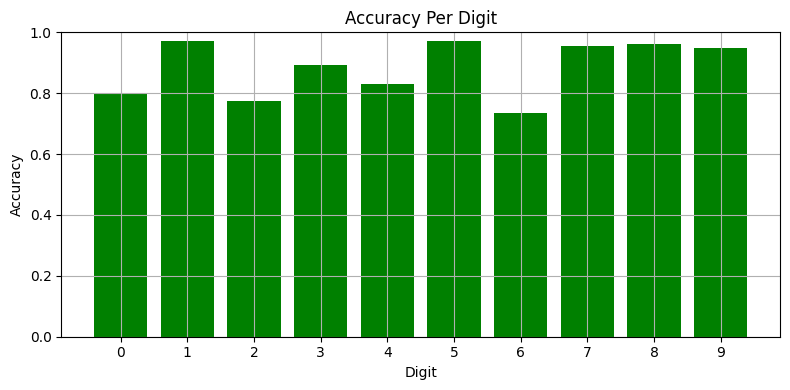

In [27]:
correct_preds = y_pred_classes == y_true
per_class_accuracy = []

for i in range(10):
    idxs = np.where(y_true == i)[0]
    acc = np.sum(correct_preds[idxs]) / len(idxs)
    per_class_accuracy.append(acc)

plt.figure(figsize=(8,4))
plt.bar(range(10), per_class_accuracy, color='green')
plt.title("Accuracy Per Digit")
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.xticks(range(10))
plt.ylim(0.0, 1.0)
plt.grid(True)
plt.tight_layout()
plt.show()
